In [1]:
# Parametersdata_path = '{PATH_1}'h5_name = '{PATH_2}'prj_name = "CATATAC_CATATAC_CRISPR-DMSO2"protosp_path = '{PATH_3}'

In [2]:
# data_path = '{PATH_4}'# h5_name = '{PATH_5}'# prj_name = "CATATAC_CATATAC_4_CRISPR7"# protosp_path = '{PATH_6}'

In [3]:
library(Seurat)library(SeuratDisk)library(Signac)library(EnsDb.Hsapiens.v86)library(dplyr)library(ggplot2)library(bedr)library(Biostrings)library(SeuratPipe)library(scales)library(reshape2)library(Hmisc)library(tidyr)library(patchwork)library(readr)library(Biobase)#source('{PATH_7}')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



Attaching SeuratObject



Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.8.0-CAPI-1.13.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 Linking to sp version: 2.0-0 
 Polygon checking: TRUE 




Loading required package: ensembldb



Loading required package: BiocGenerics




Attaching package: ‘BiocGenerics’




The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs




The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min




Loading required package: GenomicRanges



Loading required package: stats4



Loading required package: S4Vectors




Attaching package: ‘S4Vectors’




The following object is masked from ‘package:utils’:

    findMatches




The following objects are masked from ‘package:base’:

    expand.grid, I, unname




Loading required package: IRanges



Loading required package: GenomeInfoDb



Loading required package: GenomicFeatures



Loading required package: AnnotationDbi



Loading required package: Biobase



Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.




Warning message:
“multiple methods tables found for ‘aperm’”


Warning message:
“replacing previous import ‘BiocGenerics::aperm’ by ‘DelayedArray::aperm’ when loading ‘SummarizedExperiment’”


Loading required package: AnnotationFilter




Attaching package: 'ensembldb'




The following object is masked from 'package:stats':

    filter





Attaching package: 'dplyr'




The following objects are masked from 'package:ensembldb':

    filter, select




The following object is masked from 'package:AnnotationDbi':

    select




The following object is masked from 'package:Biobase':

    combine




The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union




The following object is masked from 'package:GenomeInfoDb':

    intersect




The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union




The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union




The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union




The following objects are masked from 'package:stats':

    filter, lag




The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union






######################
#### bedr v1.0.7 ####
######################

checking binary availability...
  * Checking path for bedtools... PASS
    /usr/local/bin/bedtools
  * Checking path for bedops... PASS
    /usr/bin/bedops
  * Checking path for tabix... PASS
    /usr/local/bin/tabix
tests and examples will be skipped on R CMD check if binaries are missing




Loading required package: XVector




Attaching package: 'Biostrings'




The following object is masked from 'package:base':

    strsplit




Loading required package: lattice



Loading required package: survival



Loading required package: Formula




Attaching package: 'Hmisc'




The following objects are masked from 'package:Biostrings':

    mask, translate




The following objects are masked from 'package:dplyr':

    src, summarize




The following object is masked from 'package:AnnotationDbi':

    contents




The following object is masked from 'package:Biobase':

    contents




The following object is masked from 'package:SeuratObject':

    Key




The following object is masked from 'package:Seurat':

    Key




The following objects are masked from 'package:base':

    format.pval, units





Attaching package: 'tidyr'




The following object is masked from 'package:reshape2':

    smiths




The following object is masked from 'package:S4Vectors':

    expand





Attaching package: 'readr'




The following object is masked from 'package:scales':

    col_factor




In [4]:
set.seed(12345678)#setwd('{PATH_8}')

In [5]:
min.cells.for.chrom.assay <- NULL

In [6]:
# the 10x hdf5 file contains both data types.# condition <- "cond6"# main_path <- '{PATH_TO_DATA_PATH_PASTE0_MAIN_PATH_CONDITION_PATH_9_H5_NAME_PASTE0_MAIN_PATH_CONDITION_PATH_10_PRJ_NAME_PASTE0_CATATAC_CONDITION_DATA_PATH_PATH_11_H5_NAME_PATH_12_PRJ_NAME_CATATAC_CONDITION1_MX_PATH_PASTE0_DATA_PATH}'/filtered_feature_bc_matrix/")

In [7]:
mx_path

[1] "/data2/kfeng/deeper_guides_dasatinib/dasatinib_primary_01HD/DMSO2/cellranger/outs/filtered_feature_bc_matrix/"

# Load 10x data

In [8]:
inputdata.10x <- Read10X(mx_path)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [9]:
# extract RNA and ATAC data
rna_counts  <- inputdata.10x$`Gene Expression`
atac_counts <- inputdata.10x$Peaks

## Create Seurat object

In [10]:
seurat <- CreateSeuratObject(counts = rna_counts, project = prj_name)

In [11]:
n_init_cell_count = length(Cells(seurat))
n_init_cell_count

[1] 13569

Get mitochondrial content

In [12]:
seurat[["percent.mt"]] <- PercentageFeatureSet(seurat, pattern = "^MT-")

In [13]:
# Now add in the ATAC-seq data
# we'll only use peaks in standard chromosomes
grange.counts <- StringToGRanges(rownames(atac_counts), sep = c(":", "-"))
grange.use <- seqnames(grange.counts) %in% standardChromosomes(grange.counts)

In [14]:
atac_counts <- atac_counts[as.vector(grange.use), ]
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)

Warning message:
"no function found corresponding to methods exports from 'BSgenome' for: 'releaseName'"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"


In [15]:
seqlevelsStyle(annotations) <- 'UCSC'
genome(annotations)         <- "hg38"

Consider using the MACS2 peaks caller :https://satijalab.org/signac/articles/seurat_multiomic.html
"The set of peaks identified using Cellranger often merges distinct peaks that are close together.
This can create a problem for certain analyses, particularly motif enrichment analysis and
peak-to-gene linkage. To identify a more accurate set of peaks, we can call peaks using MACS2
with the CallPeaks() function. Here we call peaks on all cells together, but we could identify 
peaks for each group of cells separately by setting the group.by parameter, and this can help 
identify peaks specific to rare cell populations."

In [16]:
frag.file <- paste0(data_path, '{PATH_13}')chrom_assay <- CreateChromatinAssay(   counts = atac_counts,   sep = c(":", "-"),   genome = 'hg38',   fragments = frag.file,   annotation = annotations )seurat[["ATAC"]] <- chrom_assay# removed min.cells = min.cells.for.chrom.assay

Computing hash



In [17]:
# add the gene information to the object
DefaultAssay(seurat) <- "ATAC"
Annotation(seurat) <- annotations
DefaultAssay(seurat) <- "RNA"

## QC

### Get RNA counts per cell

In [18]:
counts_per_cell <- Matrix::colSums(rna_counts)
cat("counts per cell: ", counts_per_cell[1:20], "\n") ## counts for first 5 cells

counts per cell:  10856 23754 5007 8612 9988 7404 21469 7101 24564 11709 9644 14969 12529 7329 15446 3730 10467 7427 7540 8606 


In [19]:
counts_per_gene <- Matrix::rowSums(rna_counts)
cat("counts per gene: ", counts_per_gene[1:20], "\n")  

counts per gene:  187 0 0 51 4 0 434 6 6 0 0 1 0 11 4681 2 1797 343 157 281 


In [20]:
genes_per_cell <- Matrix::colSums(rna_counts > 0) # count gene only if it has non-zero reads mapped.
cat("counts for non-zero genes: ", genes_per_cell[1:5])  ## counts for first 5 genes

counts for non-zero genes:  4006 5626 2239 3479 3739

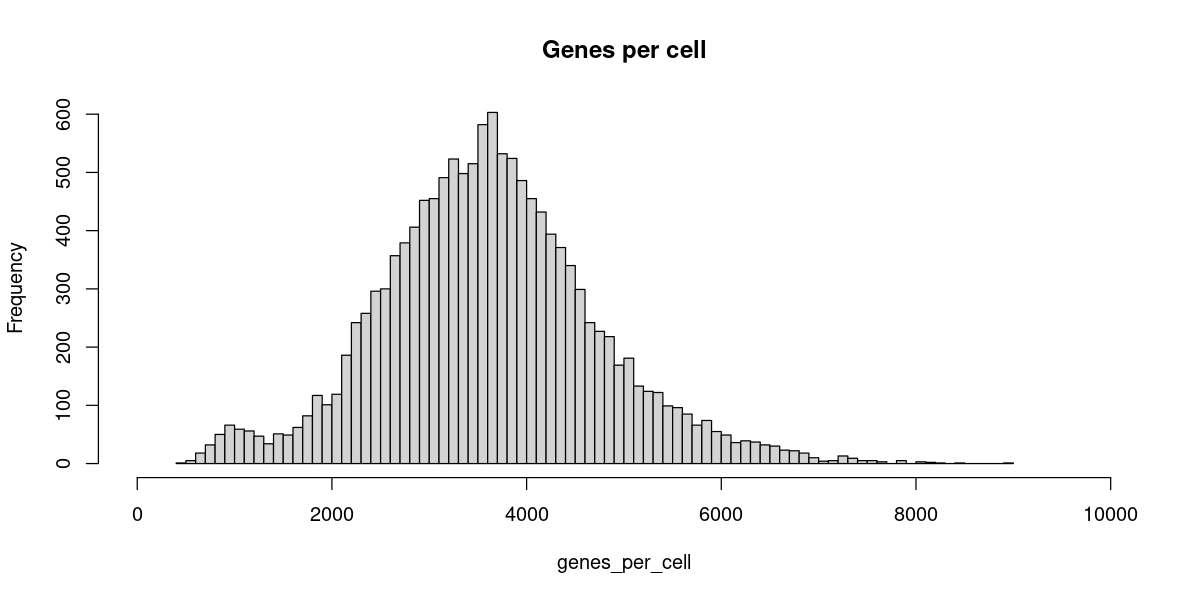

In [21]:
options(repr.plot.width=10, repr.plot.height=5)
#plot_log <- hist(log10(genes_per_cell), main="Genes per cell", breaks=100)
plot_lin <- hist(genes_per_cell, main="Genes per cell", breaks=100, xlim=c(1,10000))

### --

## ATAC counts per peak

Warning message:
"Transformation introduced infinite values in continuous y-axis"


Warning message:
"Removed 94 rows containing missing values (`geom_bar()`)."


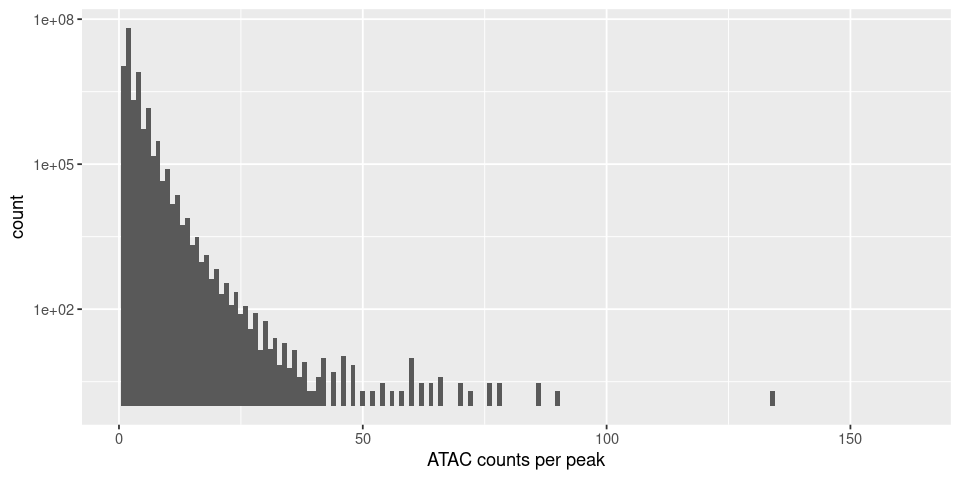

In [22]:
options(repr.plot.width=8, repr.plot.height=4)
x <- atac_counts@x
ggplot(data.frame(x), aes(x)) +
  geom_histogram(binwidth = 1) +
  scale_y_log10() +
  labs(x="ATAC counts per peak")

## Plot ATAC counts per cell 

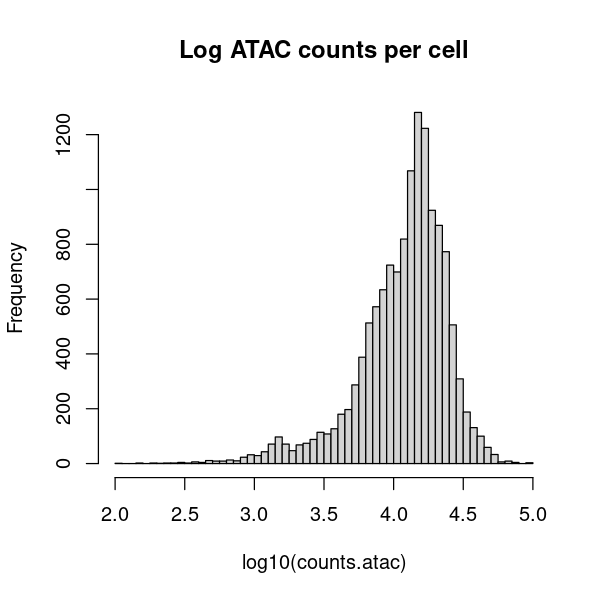

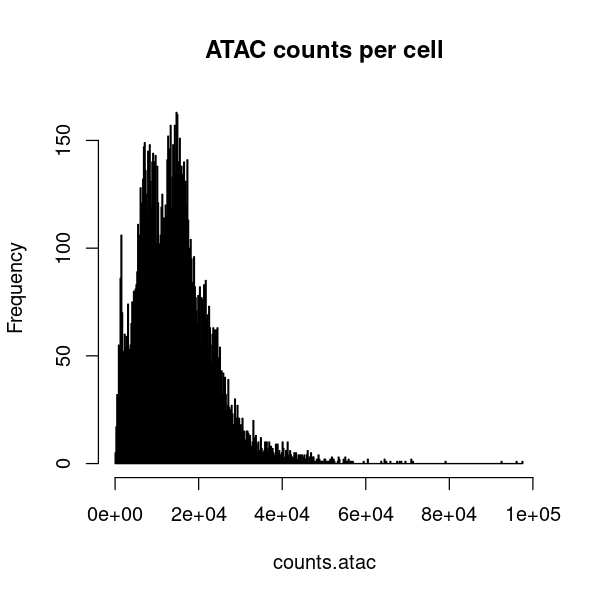

In [23]:
options(repr.plot.width=5, repr.plot.height=5)
#par(mfrow=c(1,2))
counts.atac <- seurat@meta.data$nCount_ATAC
plot_log    <- hist(log10(counts.atac), main="Log ATAC counts per cell", breaks=100, xlim=c(2,5))
plot_lin    <- hist(counts.atac, main="ATAC counts per cell", breaks=500, xlim=c(1,100000))

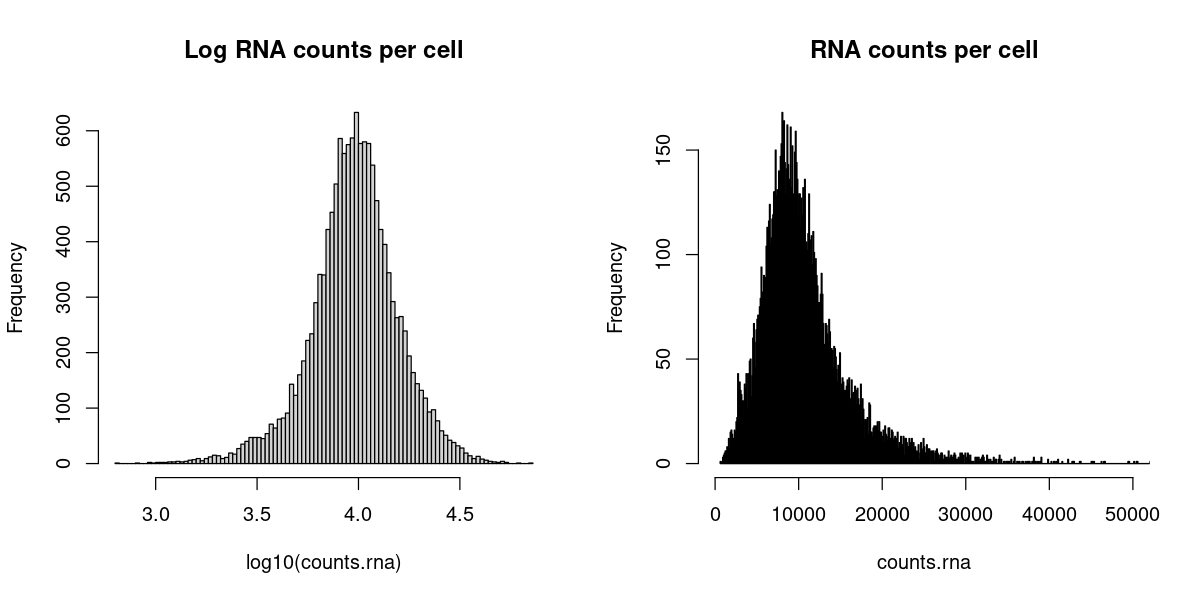

In [24]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
counts.rna <- seurat@meta.data$nCount_RNA
plot_log    <- hist(log10(counts.rna), main="Log RNA counts per cell", breaks=100)
plot_lin    <- hist(counts.rna, main="RNA counts per cell", breaks=500, xlim=c(1,50000))

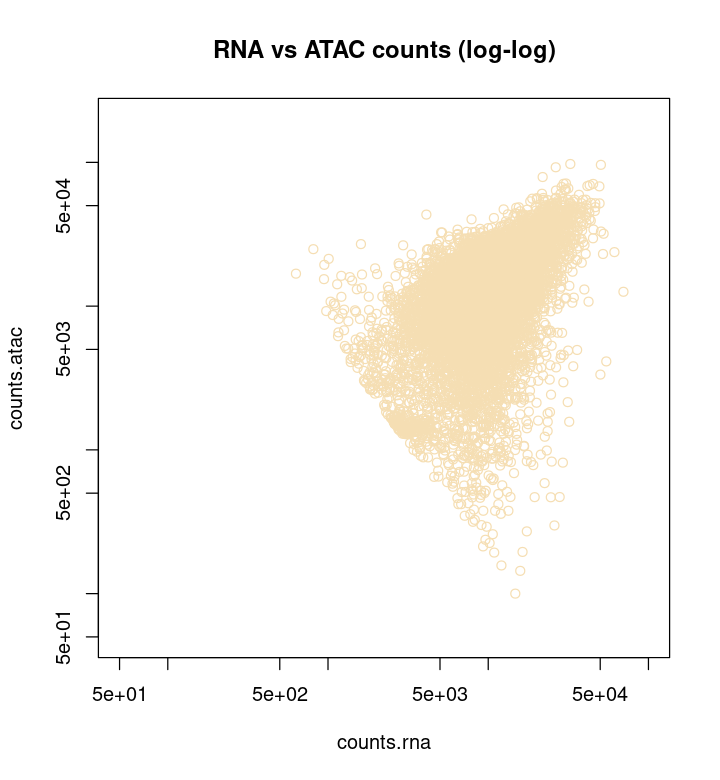

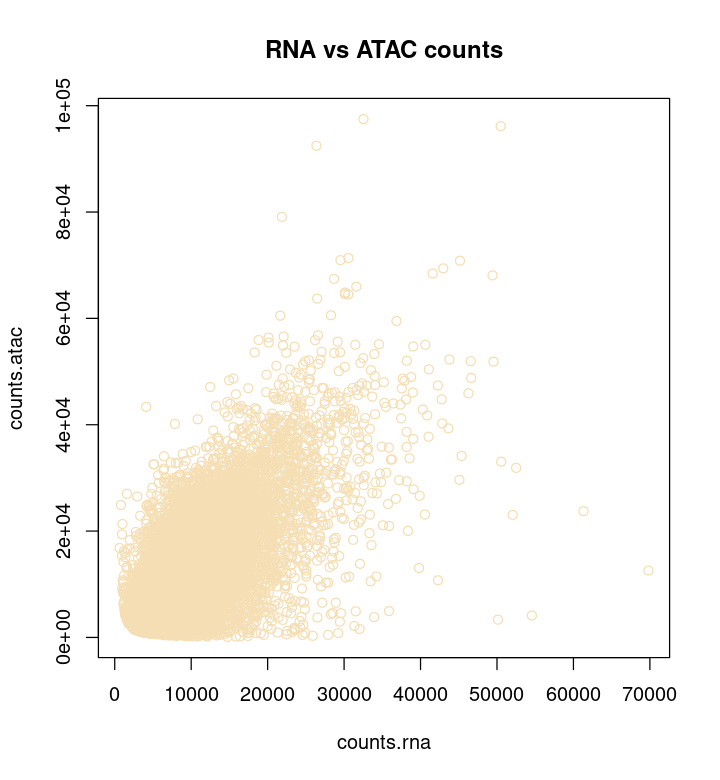

In [25]:
options(repr.plot.width=6, repr.plot.height=6.5)
#par(mfrow=c(1,2))
plot(counts.rna, counts.atac, log='xy', col='wheat', xlim=c(50,100000), ylim=c(50,200000))
title('RNA vs ATAC counts (log-log)')
plot(counts.rna, counts.atac, col='wheat')
title('RNA vs ATAC counts')

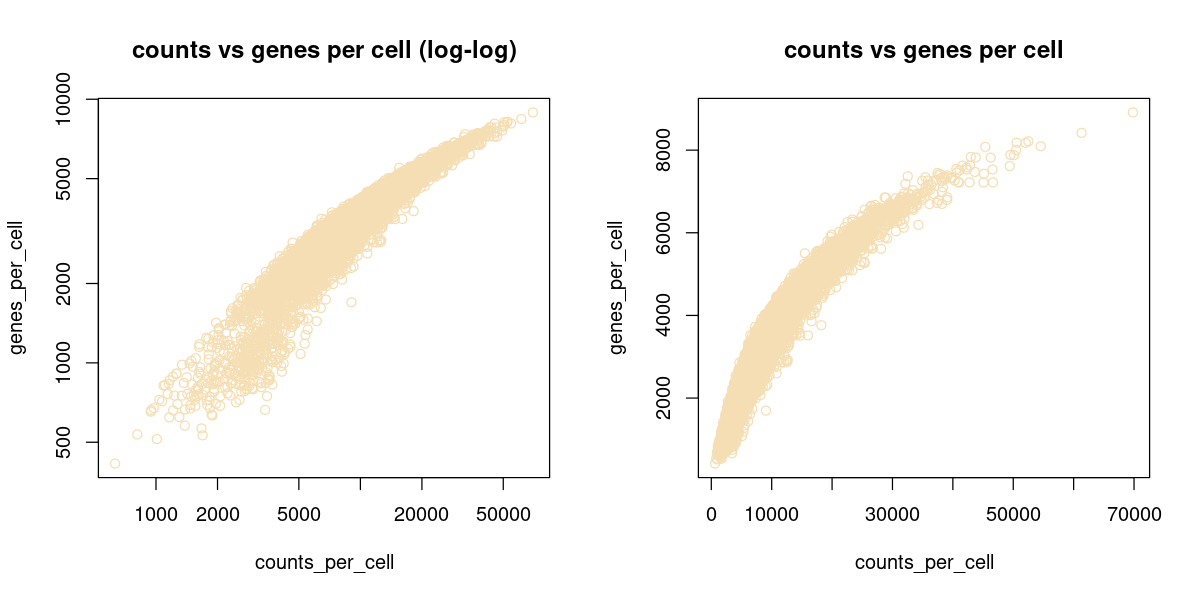

In [26]:
options(repr.plot.width=10, repr.plot.height=5)
par(mfrow=c(1,2))
plot(counts_per_cell, genes_per_cell, log='xy', col='wheat')
title('counts vs genes per cell (log-log)')
plot(counts_per_cell, genes_per_cell, col='wheat')
title('counts vs genes per cell')

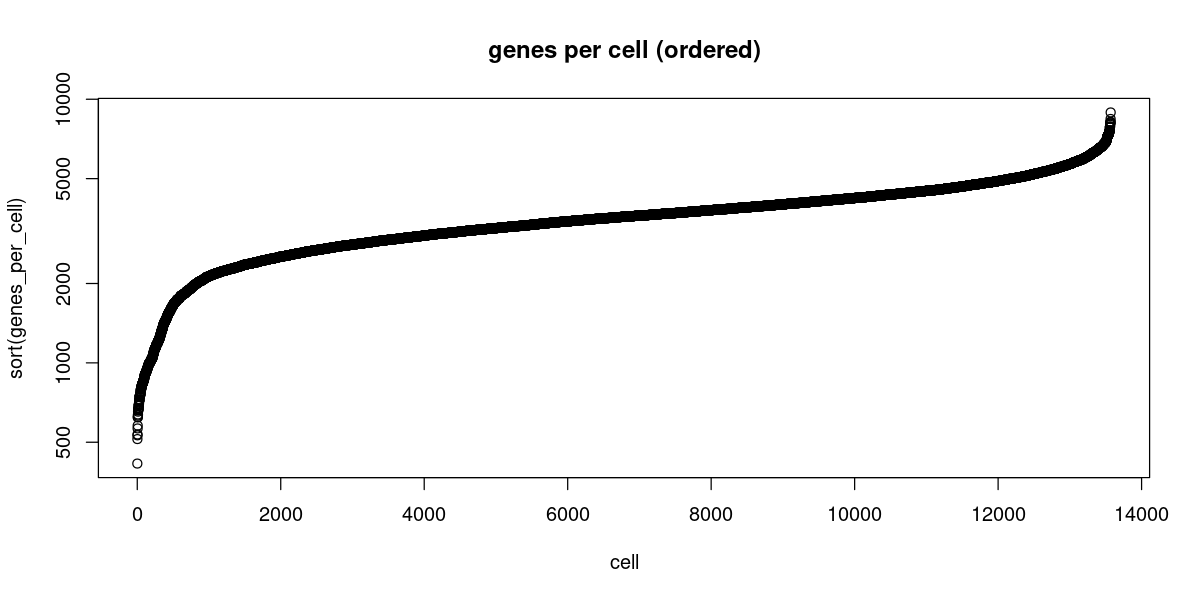

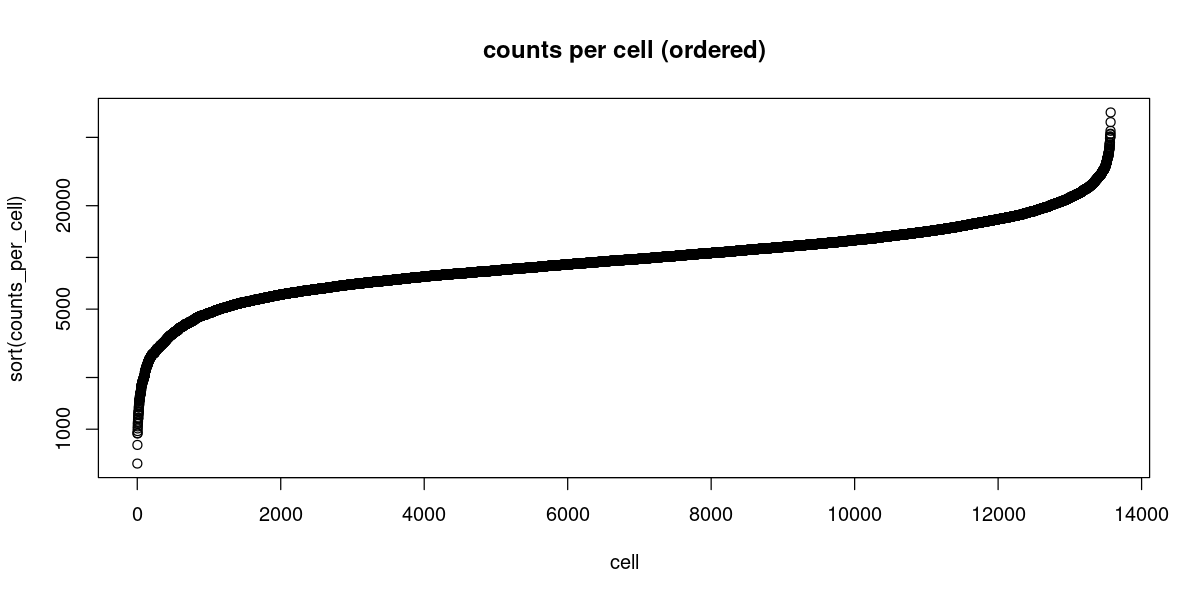

In [27]:
plot(sort(genes_per_cell), xlab='cell', log='y', main='genes per cell (ordered)')
plot(sort(counts_per_cell), xlab='cell', log='y', main='counts per cell (ordered)')

In [28]:
#FeatureScatter(object = seurat, feature1 = "nCount_RNA", feature2 = "nCount_ATAC", log)

### QC using houskeeping genes

In [29]:
# Load the the list of house keeping geneshkgenes <- read.table('{PATH_14}', skip = 2)hkgenes <- as.vector(hkgenes$V1)

In [30]:
# remove hkgenes that were not found
hkgenes.found <- which(toupper(rownames(seurat@assays$RNA@data)) %in% hkgenes)

In [31]:
num_hk_genes = length(hkgenes.found)
num_hk_genes

[1] 95

In [32]:
n.expressed.hkgenes <- Matrix::colSums(seurat@assays$RNA@data[hkgenes.found, ] > 0)

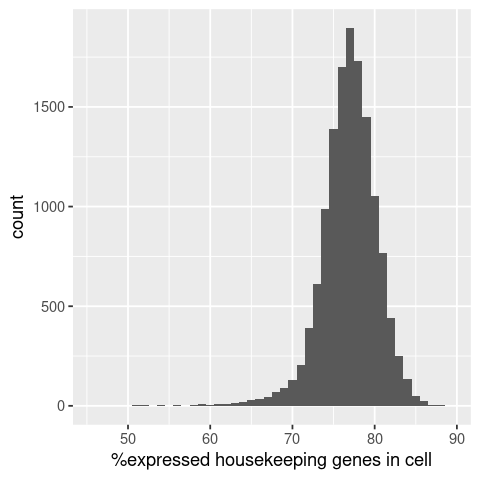

In [33]:
options(repr.plot.width=4, repr.plot.height=4)
df.expressed.hk <- data.frame(100*n.expressed.hkgenes/num_hk_genes)
ggplot(df.expressed.hk, aes(n.expressed.hkgenes)) + geom_histogram(binwidth=1) + labs(x="%expressed housekeeping genes in cell")

### QC by mitochondrial genes

Warning message:
"Removed 171 rows containing missing values (`geom_point()`)."


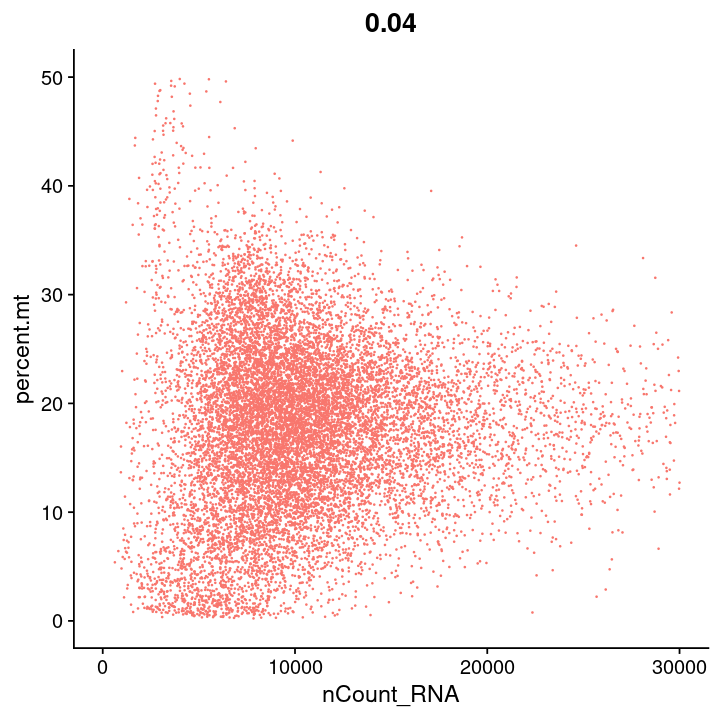

In [34]:
options(repr.plot.width=6, repr.plot.height=6)
plot1 <- FeatureScatter(seurat, feature1 = "nCount_RNA", feature2 = "percent.mt", pt.size=.1)
plot1 + xlim(c(0,30000)) + ylim(c(0,50)) + NoLegend()

## More ATAC QC

In [35]:
DefaultAssay(seurat) <- "ATAC"
seurat <- NucleosomeSignal(seurat)
seurat <- TSSEnrichment(seurat)

Extracting TSS positions



Extracting fragments at TSSs




Computing TSS enrichment score



Peak region fragments is not in the object. Find out why.

In [36]:
# add blacklist ratio and fraction of reads in peaks
#seurat$pct_reads_in_peaks <- seurat$peak_region_fragments / seurat$passed_filters * 100
#seurat$blacklist_ratio <- seurat$blacklist_region_fragments / seurat$peak_region_fragments

In [37]:
df.nucleosome.signal <- data.frame(seurat@meta.data$nucleosome_signal)
df.tss.enrichment    <- data.frame(seurat@meta.data$TSS.enrichment)

Warning message:
"Removed 5 rows containing non-finite values (`stat_bin()`)."


Warning message:
"Removed 2 rows containing missing values (`geom_bar()`)."


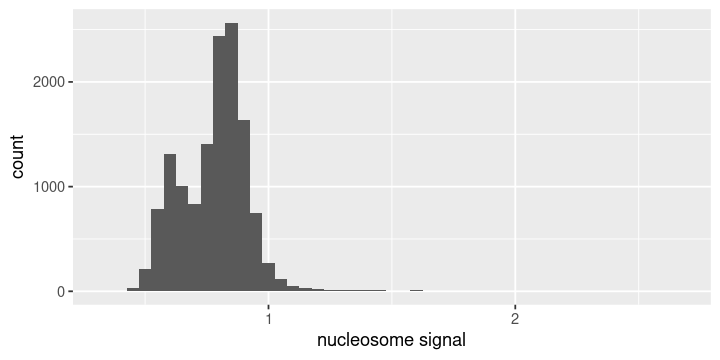

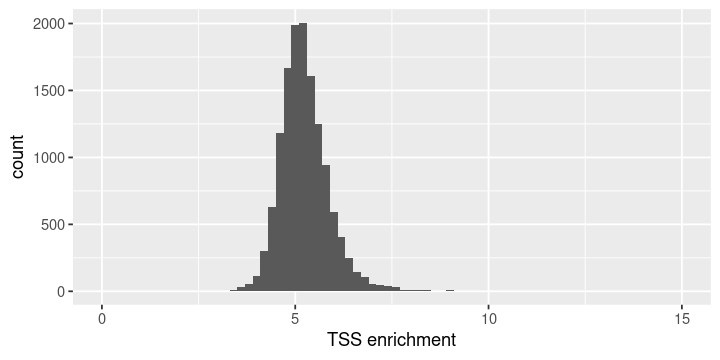

In [38]:
options(repr.plot.width=6, repr.plot.height=3)
ggplot(df.nucleosome.signal, aes(seurat.meta.data.nucleosome_signal)) +
    geom_histogram(binwidth=.05) +
    labs(x="nucleosome signal")

ggplot(df.tss.enrichment, aes(seurat.meta.data.TSS.enrichment)) +
    geom_histogram(binwidth=.2) +
    labs(x="TSS enrichment") +
    xlim(0,15)

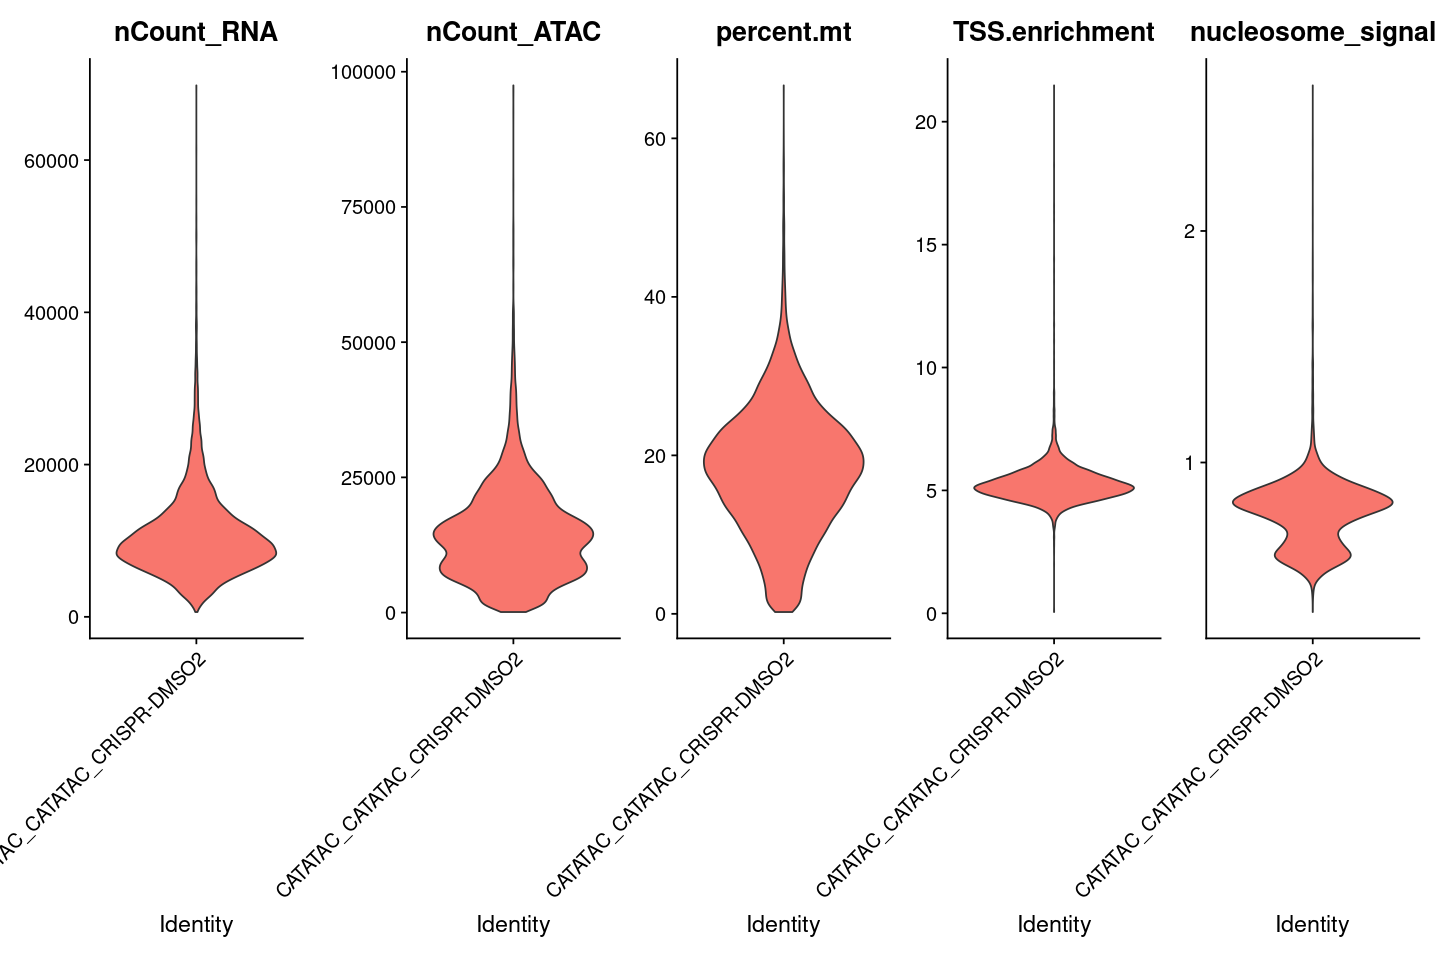

In [39]:
options(repr.plot.width=12, repr.plot.height=8)

VlnPlot(
  object = seurat,
  features = c("nCount_RNA", "nCount_ATAC", "percent.mt", "TSS.enrichment", "nucleosome_signal"),
  ncol = 5,
  pt.size = 0
)

## Filter out low quality cells

In [40]:
seurat <- subset(
  x = seurat,
  subset = nCount_ATAC < 6e4 &
    nCount_ATAC > 1000 &
    nCount_RNA < 40000 &
    nCount_RNA > 1000 &
    percent.mt < 20 &
    nucleosome_signal < 2 &
    TSS.enrichment > 1
)


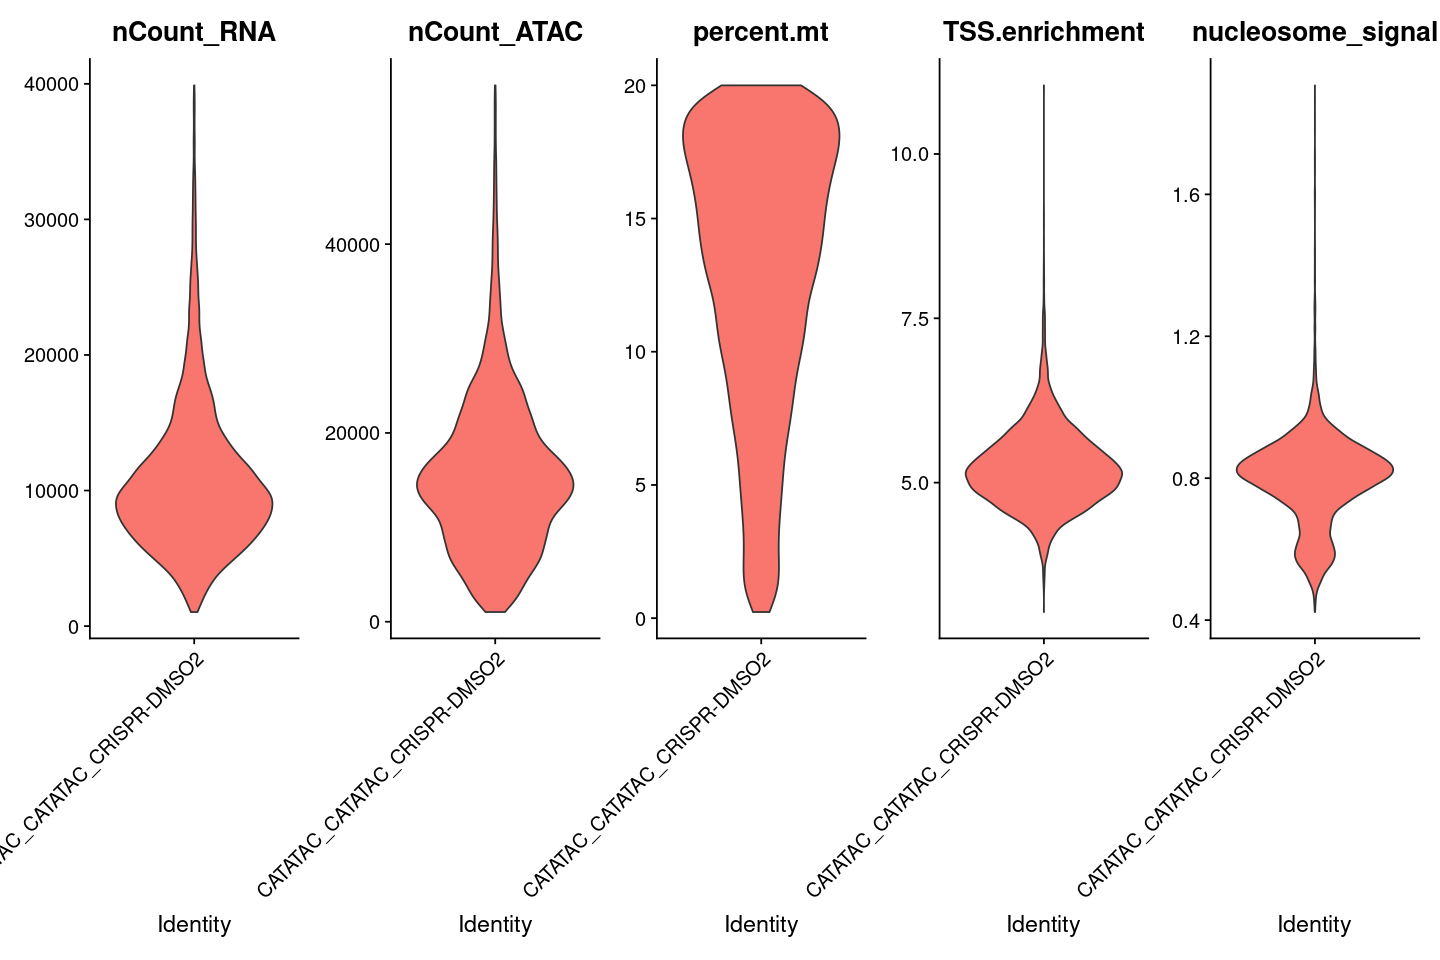

In [41]:
options(repr.plot.width=12, repr.plot.height=8)

VlnPlot(
  object = seurat,
  features = c("nCount_RNA", "nCount_ATAC", "percent.mt", "TSS.enrichment", "nucleosome_signal"),
  ncol = 5,
  pt.size = 0
)

In [42]:
n_filtered_cells = length(Cells(seurat))
frac_filtered = (n_init_cell_count - n_filtered_cells) / n_filtered_cells
cat("Frac filtered doublets:", frac_filtered)

Frac filtered doublets: 0.6872668

## Normalization, PCA, UMAP, SVD

In [43]:
DefaultAssay(seurat) <- "RNA"
seurat <- SCTransform(seurat, verbose = FALSE) %>% 
          RunPCA() %>% 
          RunUMAP(dims = 1:50, reduction.name = 'umap.rna', reduction.key = 'rnaUMAP_')

PC_ 1 
Positive:  XACT, LINC02476, IMMP2L, STXBP5, LINC02109, AL445255.1, FHIT, SMYD3, LINC02163, AP000561.1 
	   DIAPH3, KCNQ5, MIR548XHG, DLEU1, ACSM3, RAD51B, ARL15, CPED1, WWOX, AL110292.1 
	   MIR924HG, PTH2R, EXOC4, CNTNAP2, ZFPM2, TBC1D5, AC093515.1, AC079466.1, MALAT1, SLC25A37 
Negative:  RPLP1, RPS8, EEF1A1, RPL41, RPL37, RPS15, RPS12, RPL19, RPS27A, RPS23 
	   RPL37A, RPS18, RPL32, FTH1, RPS28, RPL39, RPL28, HSP90AA1, RPL13A, RPS24 
	   RPS21, RPS14, HSP90AB1, RPS27, RPLP2, RPL30, RPS11, ACTB, RPS15A, RPL11 
PC_ 2 
Positive:  FLT1, SLC20A1, NEAT1, BACH2, TIMP1, BTG2, CASS4, EGR1, MALAT1, SQSTM1 
	   VIM, TAFA2, AREG, MARCH3, YES1, GDF15, TNIK, HMGCS1, MBD5, IER3 
	   AC016074.2, LINC02163, TMSB10, CPEB4, TMEM158, VGF, IER2, AL117329.1, TGFB1, AC109466.1 
Negative:  ASPM, DIAPH3, TOP2A, CENPF, KIF14, CENPE, MT-ND2, SMC4, MT-ATP8, TPX2 
	   CDCA2, MIR924HG, POLQ, C21orf58, KIF18A, BUB1, SCLT1, NCAPG, AC093515.1, KIF18B 
	   MKI67, RFC3, ANLN, BRIP1, HMMR, KIF15, AP000561.1, CI

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


14:28:11 UMAP embedding parameters a = 0.9922 b = 1.112



14:28:11 Read 8042 rows and found 50 numeric columns



14:28:11 Using Annoy for neighbor search, n_neighbors = 30



14:28:11 Building Annoy index with metric = cosine, n_trees = 50



0%   10   20   30   40   50   60   70   80   90   100%



[----|----|----|----|----|----|----|----|----|----|



*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


*


|



14:28:12 Writing NN index file to temp file /tmp/Rtmp5edD2T/file3e2046626eae6



14:28:12 Searching Annoy index using 1 thread, search_k = 3000



14:28:14 Annoy recall = 100%



14:28:16 Commencing smooth kNN distance calibration using 1 thread


 with target n_neighbors = 30



14:28:18 Initializing from normalized Laplacian + noise (using irlba)



14:28:18 Commencing optimization for 500 epochs, with 360192 positive edges



14:28:27 Optimization finished



# Mark doublets

Skipping this step. Scrublet detects only a few doublets. Also m3addon won't load on Angela's Jupyter account.

In [44]:
#cds = as.cell_data_set(seurat)

In [45]:
# cds    <- my_scrublet_R(
#             cds, 
#             n_prin_comps = 30,
#             return_results_only = FALSE,
#             min_counts=2, 
#             min_cells=3, 
#             min_gene_variability_pctl=85
#         )

### Assigning fake doublet scores, so that the rest of the pipeline won't fail. 

In [46]:
seurat$predicted_doublets = FALSE
seurat$doublet_scores = 0

In [47]:
#seurat_w_doublet_scores <- append_doublet_results(cds, seurat)
SaveH5Seurat(seurat, h5_name, overwrite = TRUE, verbose = FALSE)

Warning message:
"Overwriting previous file /data2/kfeng/deeper_guides_dasatinib/secondary/DMSO2/seurat/CATATAC_CRISPR-DMSO2.h5seurat"


Creating h5Seurat file for version 3.1.5.9900



In [48]:
#table(seurat_w_doublet_scores$predicted_doublets)